In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme(style="white", context="talk")

In [3]:
def build_histogram_table(dataframe, feature_name: str, identifier: str='id'):
    return (dataframe
        .groupby(feature_name, as_index=False)
        .count()[[feature_name, identifier]]
        .rename(columns={identifier: 'count'})
        .sort_values(['count'], ascending=False)
    )

In [4]:
def plot_histogram(dataframe, feature_name: str, identifier: str='id', top: int=20, sort_ascending: bool=False, log_scale: bool=True):
    df_plot_data = (dataframe
        .groupby(feature_name, as_index=False)
        .count()[[feature_name, identifier]]
        .rename(columns={identifier: 'count'})
        .sort_values(['count'], ascending=sort_ascending)
        .head(top)
    )
    
    fig, ax = plt.subplots(figsize=(14, 7))
    sns.barplot(
        x=df_plot_data[feature_name],
        y=df_plot_data['count'],
        palette="rocket",
        ax=ax
    )
    if log_scale:
        ax.set_yscale('log')
    ax.set_xlabel('')
    ax.set_ylabel('Number of records' + (' (log scale)' if log_scale else '' ))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
    if log_scale:
        ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0.1,1,0.1)))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    # ax.yaxis.set_minor_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
    ax.tick_params(which='minor', labelsize=13)
    ax.grid(True, which="both", ls="-", c='#cccccc')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    return fig, ax

In [5]:
df_data = pd.read_csv('../data/ice-cat-office-products.csv.gz', dtype=str, index_col=0)

In [6]:
df_data

,id,supplier_id,supplier_name,category_id,category_name,title,model_name,description_short,description_middle,description_long,...,Window,Windows operating systems supported,Wiper included,Working area,Working width,Wrist rest,Writing colours,Writing line length,x10n key,Zoom capability
0,1710,1,HP,718,Greeting & Sympathy Cards,HP C6042A greeting/sympathy card Photo greetin...,C6042A,"Matte Greeting Card-20 cards, A4, 210x297mm",NaN,<b>Summary</b>\nPersonal greetings made easy w...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1983,1,HP,718,Greeting & Sympathy Cards,HP C6829A greeting/sympathy card Standard gree...,C6829A,HP Textured Cream Half-fold Greeting Cards-20 ...,NaN,HP Textured Greeting Cards have a warm cream c...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13397,1,HP,303,Fax Machines,HP fax 1220 fax machine,fax 1220,fast colour faxing with advanced business feat...,NaN,The HP Fax 1220 is a standalone professional p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19832,1,HP,915,Printer Cabinets & Stands,HP LaserJet Printer Cabinet printer cabinet/st...,LaserJet Printer Cabinet,HP LaserJet Printer Cabinet - For LaserJet 5Si...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20235,1,HP,495,Staples,HP 3-pack Staple Cartridge Refill 3 staples,3-pack Staple Cartridge Refill,HP 3-pack Staple Cartridge Refill,NaN,HP LaserJet flat-wire staple cartridges for Mu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,80453856,360,Legamaster,422,Bulletin Boards,Legamaster WALL-UP acoustic pinboard 200x59.5c...,WALL-UP,Legamaster WALL-UP acoustic pinboard 200x59.5c...,NaN,Minimizes sound distractions by considerably i...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7965,80453857,360,Legamaster,422,Bulletin Boards,Legamaster WALL-UP acoustic pinboard 200x59.5c...,WALL-UP,Legamaster WALL-UP acoustic pinboard 200x59.5c...,NaN,Minimizes sound distractions by considerably i...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7966,80458478,1,HP,980,Stapler Units,HP PageWide External Stapler Stacker,PageWide External Stapler Stacker,PageWide External Stapler Stacker,<b>Help avoid job interruptions with an extra ...,<b>Medium or large businesses that print large...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7967,80493748,206,3M,491,Clasp Fasteners,3M SJ3550 clasp fastener 1 pc(s),SJ3550,"Mushroom-shaped heads , Black",NaN,3M™ Dual Lock™ Reclosable Fastener SJ3550 is t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Number of Products for Top Suppliers

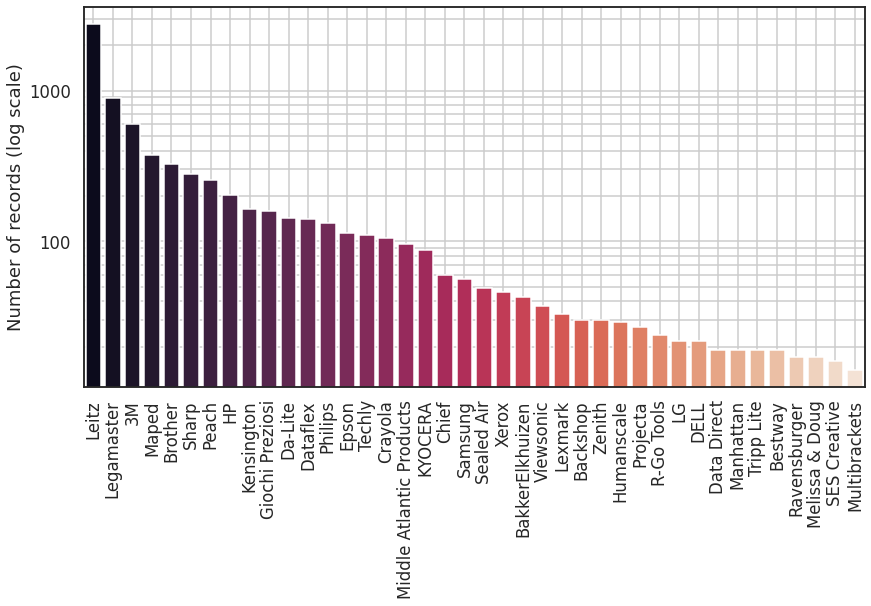

In [7]:
plot_histogram(df_data, 'supplier_name', sort_ascending=False, top=40);

## Number of Products for Top Categories

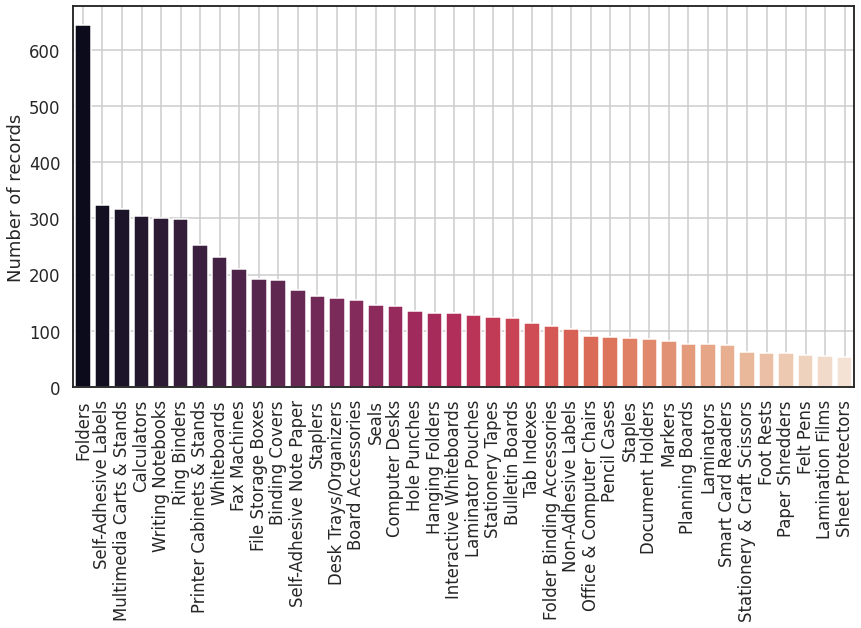

In [8]:
plot_histogram(df_data, 'category_name', top=40, log_scale=False);

## Which features are specified for each category?

In [9]:
fixed_cols = [
    'id', 'supplier_id', 'supplier_name', 'category_id', 'category_name', 'title',
    'model_name', 'description_short', 'description_middle', 'description_long',
    'summary_short', 'summary_long', 'warranty', 'is_limited', 'on_market', 'quality',
    'url_details', 'url_manual', 'url_pdf', 'created_at', 'updated_at', 'released_on',
    'end_of_life_on', 'ean', 'n_variants', 'countries'
]

feature_cols = list(set(list(df_data.columns)) - set(fixed_cols))

In [10]:
df_fill_per_category = df_data[feature_cols].groupby(df_data.category_name).count()
df_fill_per_category['n_rows'] = df_data[['id', 'category_name']].groupby('category_name').count()
cols_reordered = ['n_rows'] + list(df_fill_per_category.columns.difference(['n_rows']))
df_fill_per_category = df_fill_per_category[cols_reordered].sort_values('n_rows', ascending=False)

# Sort columns according to the most used to least used features
cols_without_nrows = df_fill_per_category.columns.difference(['n_rows']).tolist()
cols_sorted_by_usage = df_fill_per_category[cols_without_nrows].sum().sort_values(ascending=False).index.tolist()
df_fill_per_category = df_fill_per_category[['n_rows'] + cols_sorted_by_usage]

In [11]:
# df_fill_per_category.to_csv('../data/ice-cat-office-products-fill-per-category.csv')

In [12]:
df_fill_per_category

,n_rows,Product colour,Width,Weight,Height,Depth,Material,Format,Quantity per pack,Package weight,...,Standard printer languages,Standby current,Lettering height,Legs material,Legs finish type,Legs colour,Languages support,Laminator pouch included,Laminating cartridge capacity,x10n key
category_name,,,,,,,,,,,,,,,,,,,,,
Folders,645,611,554,443,542,312,409,559,143,0,...,0,0,0,0,0,0,0,0,0,0
Self-Adhesive Labels,324,304,162,54,163,0,70,29,0,7,...,0,0,0,0,0,0,0,0,0,0
Multimedia Carts & Stands,317,289,236,111,223,237,108,0,14,84,...,0,0,0,0,0,0,0,0,0,0
Calculators,305,258,144,240,144,144,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Writing Notebooks,300,219,231,184,229,205,23,184,88,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Service Carts,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Desks,1,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
Desk Tool Rails,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
